In [184]:
datasetFolder = "data/MFPT96Scalograms"
name = "MFPT96Scalograms"
isMatData = False
outFolder = "/home/aferral/"

In [185]:
import os
outFolder = os.path.join(outFolder,name)
if not os.path.exists(outFolder):
    os.makedirs(outFolder)

In [186]:
from infogan.misc.dataset import Dataset
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from collections import Counter
import random

from sklearn.decomposition import PCA
import pandas
import seaborn as sns
from traditionalClusteringTests.dataUtils import showDimRed

from traditionalClusteringTests.dataUtils import flatInput,getNewDataset,inverseNorm, processPca,\
    showDataplots,simplemethodsresults, pca2Visua, showRandomImages,showMeanstd
%matplotlib inline

In [188]:
flattenDataset, flatTest, fTrainLabels, fTestLabels,dataset = getNewDataset(datasetFolder,seed=1,matDataset=isMatData)
nClases = dataset.getNclasses()

There are  5296  train points   so  264  batches
There are  2271  val points 
There are  3243  test points


Distribution of data 
Train set Counter({0: 2670, 1: 1682, 2: 944}) test set Counter({0: 1616, 1: 1024, 2: 603})
Pca with 2 components explained variance [ 0.25106456  0.01763017]
PCA 2 comp of the data


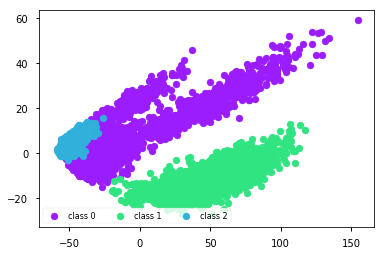

Pca with 2 components explained variance [ 0.25106456  0.01763017]
PCA 2 comp of the data


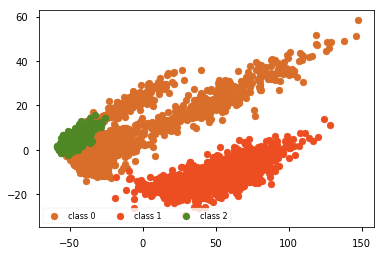

In [189]:
pca = PCA(n_components=2)
pca.fit(flattenDataset)


print "Distribution of data "
print dataset.classDistribution()

pca2Visua(pca,flattenDataset,fTrainLabels,nClases)
pca2Visua(pca,flatTest,fTestLabels,nClases)

Train image  1072d4_0.jpg
Test image  275d18_2.jpg


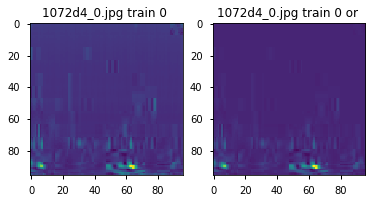

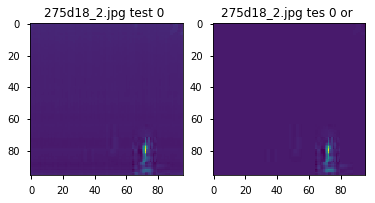

In [191]:
#Show first 1 images train and 1 image test (to show that seed changed)
#------------------TRAIN IAMGE
fname = dataset.getTrainFilename(0)
print "Train image ",fname

imTrain =   flattenDataset[0].reshape(dataset.getDataShape()[0:2])

fig, grid = plt.subplots(1, 2)
grid[0].set_title(fname+' train 0 ')
grid[0].imshow(imTrain)

#REMEMBER THE IMAGES IN THE DATASET ARE NORMALIZED 
#THIS WILL INVERT THE TRANSFORMATION (will be the same as original)
org = inverseNorm(imTrain,dataset)
grid[1].set_title(fname+' train 0 or ')
grid[1].imshow(org)

#------------------TEST IAMGE


fname = dataset.getTestFilename(0)
print "Test image ",fname
imgTest =   flatTest[0].reshape(dataset.getDataShape()[0:2])

fig, grid = plt.subplots(1, 2)
grid[0].set_title(fname+' test 0 ')
grid[0].imshow(imgTest)

#REMEMBER THE IMAGES IN THE DATASET ARE NORMALIZED 
#THIS WILL INVERT THE TRANSFORMATION (will be the same as original)
org = inverseNorm(imgTest,dataset)

grid[1].set_title(fname+' tes 0 or ')
grid[1].imshow(org)

Class  0


Class  1
Class  2


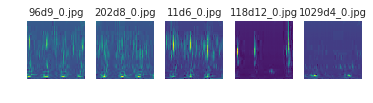

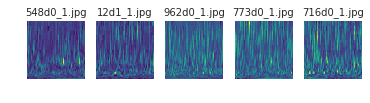

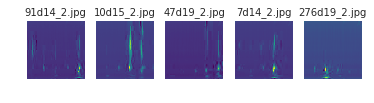

In [196]:
with sns.axes_style("white"):
    sns.set(rc={'image.cmap': "viridis"})
    showRandomImages(dataset,toShow=5)

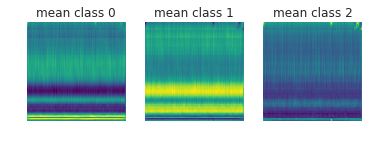

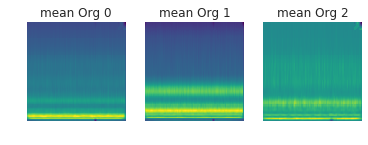

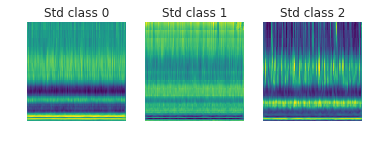

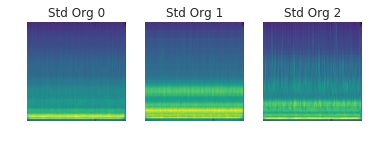

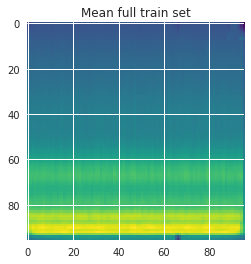

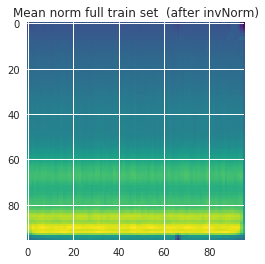

In [198]:
with sns.axes_style("white"):
    sns.set(rc={'image.cmap': "viridis"})
    showMeanstd(dataset)

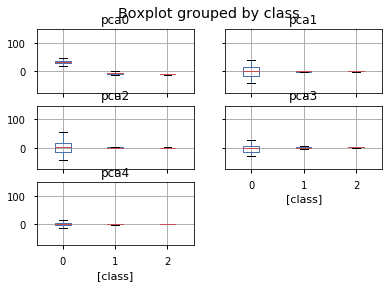

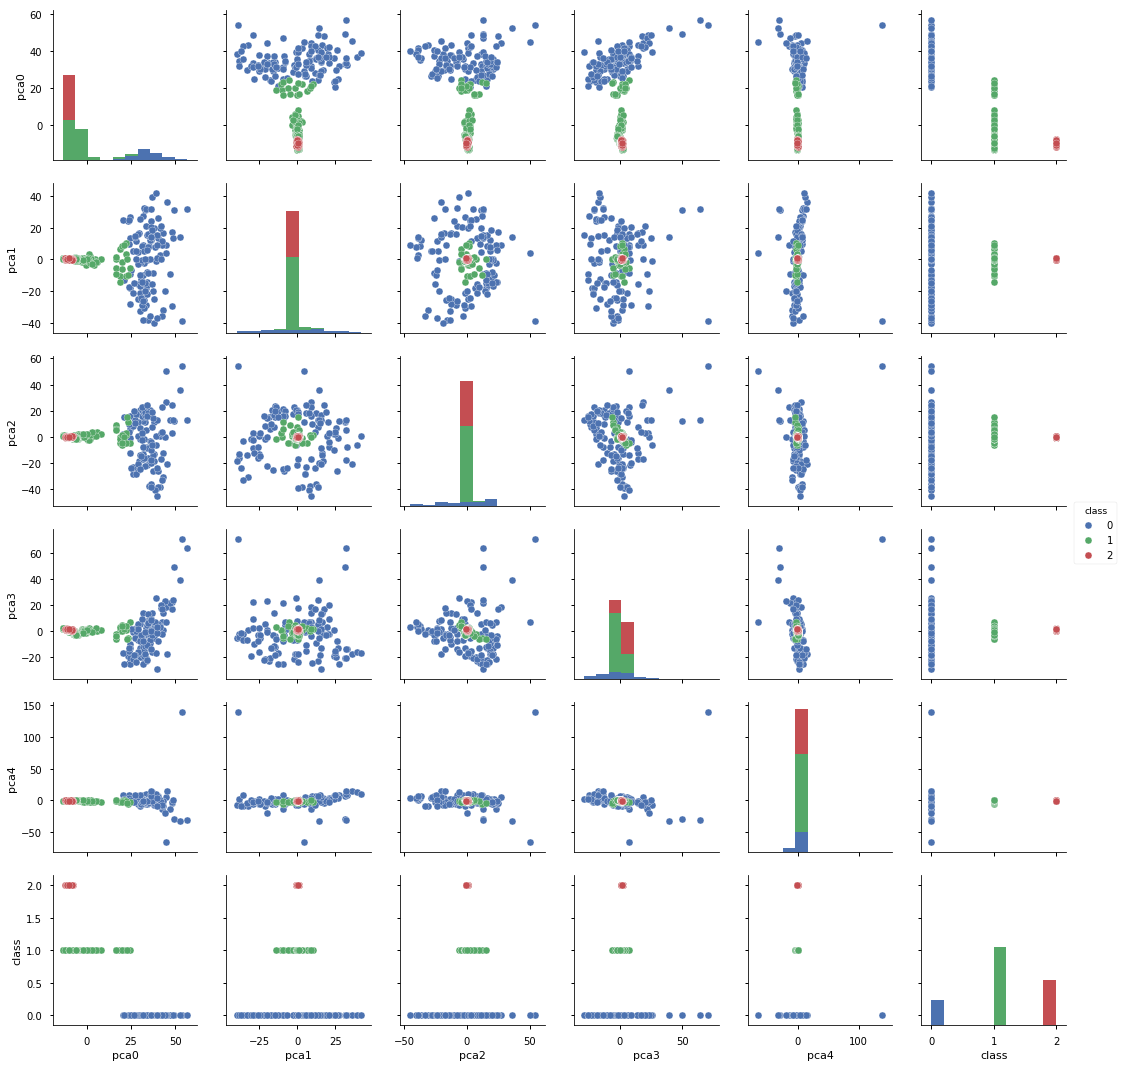

In [168]:
dx,dtestx,ltrain,ltest = processPca(flattenDataset,flatTest,fTrainLabels,fTestLabels,nComp = 5)
showDataplots(dx,ltrain)

In [199]:
from sklearn.cluster import MiniBatchKMeans


def processCluster(flattenDataset,flatTest,fTrainLabels,fTestLabels,clusteringAlg):

    if hasattr(clusteringAlg, 'predict'):
        clusteringAlg.fit(flattenDataset)
        
        dataKmTrainX = flattenDataset
        dataKmTrainy = clusteringAlg.predict(flattenDataset)
        
        dataKmTestX = flatTest
        dataKmTesty = clusteringAlg.predict(flatTest)
    else:
        dataKmTrainX = flattenDataset
        dataKmTrainy = list(clusteringAlg.fit_predict(flattenDataset))
        
        dataKmTestX = flatTest
        dataKmTesty = list(clusteringAlg.fit_predict(flatTest))
    
    return dataKmTrainX,dataKmTestX,dataKmTrainy,dataKmTesty

def showR(dataset,clusteringAlg,Xtrain,Xtest,yTrain,yTest):
    
    dxCluster,dtestxCluster,ltrainCluster,ltestCluster = processCluster(Xtrain,Xtest,yTrain,yTest,clusteringAlg)
    dxCluster,dtestxCluster,ltrainCluster,ltestCluster = processPca(dxCluster,dtestxCluster,ltrainCluster,ltestCluster,nComp = 2)
        
    from traditionalClusteringTests.dataUtils import showResults
    
    logPredicted=showResults(dataset,dxCluster,ltrainCluster,yTrain,"Cluster "+str(clusteringAlg.__class__.__name__),
                             outFolder,ax=None,showBlokeh=False,show3d=False)
    showResults(dataset,dxCluster,yTrain,yTrain,"Real",outFolder)
    print logPredicted

#Calculo con minibatch KMeans

In [200]:
fTrainLabels

array([0, 1, 2, ..., 0, 0, 2])

Pca with 2 components explained variance [ 0.93438587  0.06561413]
Pca with 2 components explained variance [ 0.93438587  0.06561413]
For class 0 there are 3051
Showing Real distribution for that generated Label Counter({0: 2067, 2: 944, 1: 40})
%dist [(0, 0.6774827925270404), (1, 0.013110455588331694), (2, 0.309406751884628)]
Clasification score 0.390294561934
For class 1 there are 1691
Showing Real distribution for that generated Label Counter({1: 1334, 0: 357})
%dist [(0, 0.2111176818450621), (1, 0.7888823181549379)]
Clasification score 0.251888217523
For class 2 there are 554
Showing Real distribution for that generated Label Counter({1: 308, 0: 246})
%dist [(0, 0.44404332129963897), (1, 0.555956678700361)]
Clasification score 0.0581570996979

Global metrics 

The ARI was 0.351192023934
The NMI was 0.400162147175
Predicted cluster number is 3
The mean classificationScore is 0.700339879154
The std classificationScore is 0.136220146987
PCA2 with predicted variance[ 0.93438587  0.0656

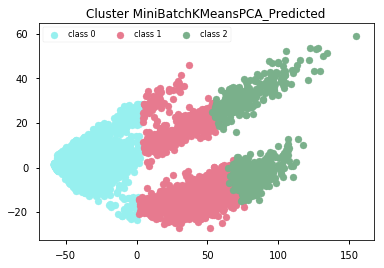

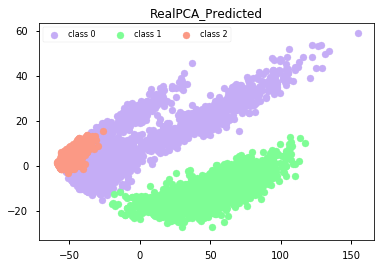

In [201]:
# Compute clustering with MiniBatchKMeans.
mbk = MiniBatchKMeans(init='k-means++', n_clusters=nClases,random_state=6)

showR(dataset,mbk,flattenDataset,flatTest,fTrainLabels,fTestLabels)

#Calculo con Spectral clustering

In [204]:
import pandas
#a,b,c,d = processCluster(flattenDataset,flatTest,fTrainLabels,fTestLabels,spectral)
#PCA(2).fit_transform(r1)
r3=pandas.DataFrame(data=PCA(2).fit_transform(a))
r3['c']=np.array(fTrainLabels)
r3.to_pickle("MFPTScalograms_real_random_state_21.pkl")

Pca with 2 components explained variance [ 0.79289753  0.20710247]
Pca with 2 components explained variance [ 0.79289753  0.20710247]
For class 0 there are 228
Showing Real distribution for that generated Label Counter({0: 119, 1: 109})
%dist [(0, 0.5219298245614035), (1, 0.4780701754385965)]
Clasification score 0.171717171717
For class 1 there are 403
Showing Real distribution for that generated Label Counter({2: 211, 1: 192})
%dist [(1, 0.47642679900744417), (2, 0.5235732009925558)]
Clasification score 0.304473304473
For class 2 there are 62
Showing Real distribution for that generated Label Counter({1: 62})
%dist [(1, 1.0)]
Clasification score 0.0894660894661

Global metrics 

The ARI was 0.2083602138
The NMI was 0.393357239326
Predicted cluster number is 3
The mean classificationScore is 0.565656565657
The std classificationScore is 0.0885798659221
PCA2 with predicted variance[ 0.79289753  0.20710247]



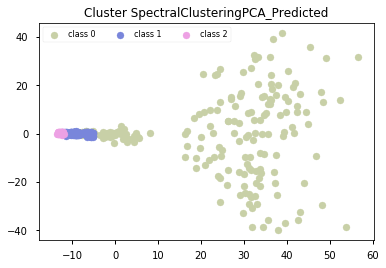

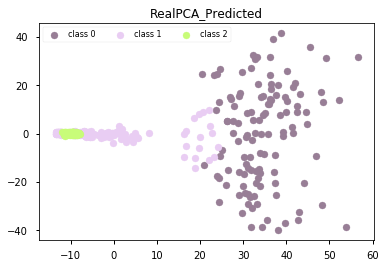

In [182]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=nClases,
                                      eigen_solver='arpack',
                                      affinity="nearest_neighbors",random_state=21)

showR(dataset,spectral,flattenDataset,flatTest,fTrainLabels,fTestLabels)